<a href="https://colab.research.google.com/github/aasawariraney10/ambiguity-resolution-in-sentence-boundary/blob/main/ambiguity_resolution_in_sentence_boundary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import io
import numpy as numpy
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Bidirectional
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import re
import random as rn
import tensorflow as tf

In [4]:
np.random.seed(37)

In [5]:
rn.seed(1254)

In [6]:
tf.random.set_seed(89)

In [7]:
from google.colab import files
uploaded = files.upload()

Saving Major Project Dataset.xlsx to Major Project Dataset.xlsx


In [8]:
import io
data = pd.read_excel(io.BytesIO(uploaded['Major Project Dataset.xlsx']))

In [9]:
print(data)

                                                      X               Y
0     Lol so there's no one who can say when they're...      End Marker
1     Mr. Stone suffered fractured ribs and chest cu...       Ambiguous
2     Before hitting the pole , Mr. Stone's car brus...       Ambiguous
3                            Mr. Vernava was uninjured.       Ambiguous
4     One house was without power for about half an ...       Ambiguous
...                                                 ...             ...
2063  Jesus! Can a man even grab a sandwich before y...  Not End Marker
2064  With a face like that? I don't want you lookin...  Not End Marker
2065       A waste? Let me tell you something, Arojaz.   Not End Marker
2066  He is a mercenary! Did he not already try to c...  Not End Marker
2067                   What? Do I have so many already?  Not End Marker

[2068 rows x 2 columns]


In [10]:
data = data[['X','Y']]

In [11]:
print(data['X'])

0       Lol so there's no one who can say when they're...
1       Mr. Stone suffered fractured ribs and chest cu...
2       Before hitting the pole , Mr. Stone's car brus...
3                              Mr. Vernava was uninjured.
4       One house was without power for about half an ...
                              ...                        
2063    Jesus! Can a man even grab a sandwich before y...
2064    With a face like that? I don't want you lookin...
2065         A waste? Let me tell you something, Arojaz. 
2066    He is a mercenary! Did he not already try to c...
2067                     What? Do I have so many already?
Name: X, Length: 2068, dtype: object


In [12]:
max_fatures = 100
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['X'].values)
X = tokenizer.texts_to_sequences(data['X'].values)
pad_X = pad_sequences(X, maxlen=100)

In [13]:
print(pad_X)

[[ 0  0  0 ... 48  2 22]
 [ 0  0  0 ... 24  6 55]
 [ 0  0  0 ...  3  1 55]
 ...
 [ 0  0  0 ...  5 42  7]
 [ 0  0  0 ...  3  3 37]
 [ 0  0  0 ... 20 39 71]]


In [14]:
pad_X.shape

(2068, 100)

In [15]:
embed_dim = 128
lstm_out = 196

In [17]:
model = Sequential()
model.add(Embedding(max_fatures, embed_dim))
model.add(SpatialDropout1D(0.4))
model.add(Bidirectional(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [18]:
Y = pd.get_dummies(data['Y']).values

In [19]:
Y

array([[False,  True, False],
       [ True, False, False],
       [ True, False, False],
       ...,
       [False, False,  True],
       [False, False,  True],
       [False, False,  True]])

In [20]:
pad_X_train, pad_X_test, Y_train, Y_test = train_test_split(pad_X,Y, test_size = 0.15, random_state = 42)
print(pad_X_train.shape,Y_train.shape)
print(pad_X_test.shape,Y_test.shape)

(1757, 100) (1757, 3)
(311, 100) (311, 3)


In [21]:
# set aside 20% of train and test data for evaluation
pad_X_train, pad_X_test, Y_train, Y_test = train_test_split(pad_X,Y,
    test_size=0.2, shuffle = True, random_state = 8)

In [22]:
# Use the same function above for the validation set
# set aside 20% of train and test data for evaluation
pad_X_train, X_val, Y_train, y_val = train_test_split(pad_X_train, Y_train,
    test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2

In [23]:
print("X_train shape: {}".format(pad_X_train.shape))
print("X_test shape: {}".format(pad_X_test.shape))
print("y_train shape: {}".format(Y_train.shape))
print("y_test shape: {}".format(Y_test.shape))
print("X_val shape: {}".format(Y_train.shape))
print("y val shape: {}".format(Y_test.shape))

X_train shape: (1240, 100)
X_test shape: (414, 100)
y_train shape: (1240, 3)
y_test shape: (414, 3)
X_val shape: (1240, 3)
y val shape: (414, 3)


In [24]:
history = model.fit(pad_X_train, Y_train, validation_split = 0.15, epochs = 50, verbose = 2)

Epoch 1/50
33/33 - 43s - 1s/step - accuracy: 0.4127 - loss: 1.0700 - val_accuracy: 0.4194 - val_loss: 1.0432
Epoch 2/50
33/33 - 41s - 1s/step - accuracy: 0.5617 - loss: 0.9165 - val_accuracy: 0.6452 - val_loss: 0.8639
Epoch 3/50
33/33 - 40s - 1s/step - accuracy: 0.6831 - loss: 0.7523 - val_accuracy: 0.7043 - val_loss: 0.7396
Epoch 4/50
33/33 - 34s - 1s/step - accuracy: 0.7116 - loss: 0.6529 - val_accuracy: 0.6882 - val_loss: 0.7376
Epoch 5/50
33/33 - 40s - 1s/step - accuracy: 0.7514 - loss: 0.6092 - val_accuracy: 0.7258 - val_loss: 0.6962
Epoch 6/50
33/33 - 41s - 1s/step - accuracy: 0.7315 - loss: 0.6156 - val_accuracy: 0.6828 - val_loss: 0.7537
Epoch 7/50
33/33 - 41s - 1s/step - accuracy: 0.7372 - loss: 0.6141 - val_accuracy: 0.7204 - val_loss: 0.7073
Epoch 8/50
33/33 - 40s - 1s/step - accuracy: 0.7457 - loss: 0.5857 - val_accuracy: 0.6935 - val_loss: 0.7277
Epoch 9/50
33/33 - 34s - 1s/step - accuracy: 0.7543 - loss: 0.5737 - val_accuracy: 0.7204 - val_loss: 0.7188
Epoch 10/50
33/33 -

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
model.save("/content/drive/MyDrive/Colab Notebooks/ARISB/ARISB_New_Data_Run.keras")

In [39]:
from tensorflow.keras.models import load_model
model = load_model("/content/drive/MyDrive/Colab Notebooks/ARISB/ARISB_New_Data_Run.keras")

In [40]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
#val_acc = history.history['val_binary_accuracy']

In [41]:
loss = history.history['loss']
#val_loss = history.history['val_loss']

In [42]:
val_acc = history.history['val_accuracy']

In [43]:
epochs_range = range(50)

Text(0.5, 1.0, 'Training Accuracy')

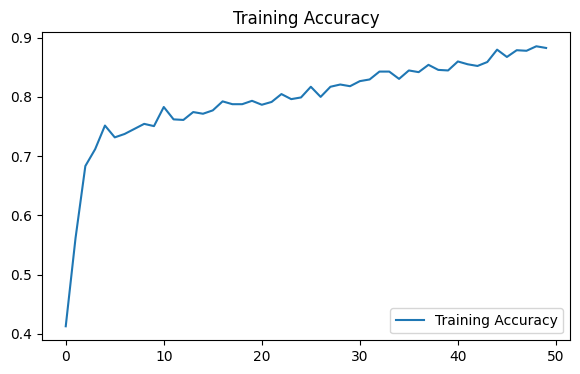

In [44]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
#plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

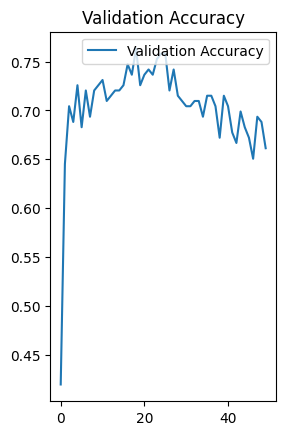

In [45]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Validation Accuracy')
plt.show()

In [46]:
prediction = model.predict(pad_X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 277ms/step


In [47]:
prediction

array([[3.52906674e-04, 5.97370490e-02, 9.39910054e-01],
       [1.12384476e-01, 8.11686516e-01, 7.59290233e-02],
       [5.68358410e-05, 8.38466704e-01, 1.61476433e-01],
       ...,
       [3.27175985e-05, 9.99944806e-01, 2.25619151e-05],
       [1.59761385e-05, 3.33133177e-03, 9.96652663e-01],
       [4.10450399e-02, 6.29540026e-01, 3.29414904e-01]], dtype=float32)

In [48]:
Prediction_Round = np.round(prediction)
print(Prediction_Round)
from sklearn.metrics import classification_report
test_labels= Y_test
print(classification_report(test_labels, Prediction_Round))

[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
              precision    recall  f1-score   support

           0       0.77      0.66      0.71       124
           1       0.65      0.70      0.68       157
           2       0.68      0.61      0.64       133

   micro avg       0.69      0.66      0.68       414
   macro avg       0.70      0.66      0.68       414
weighted avg       0.70      0.66      0.68       414
 samples avg       0.66      0.66      0.66       414



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [49]:
from google.colab import files
uploaded = files.upload()

Saving NLP_Prediction_Data.xlsx to NLP_Prediction_Data.xlsx


In [50]:
import io
pred_data = pd.read_excel(io.BytesIO(uploaded['NLP_Prediction_Data.xlsx']))

In [51]:
pred_data = pred_data[['X','Y']]

In [52]:
print(pred_data['X'])

0     I have a Ph.D in Computer Science, I am a lect...
1              What a beautiful scene it is underwater!
2                Yes sir, I attended both the meetings.
3     Tomorrow at 5:30 P.M. I will be at the auditorium
4               Do you know when the next train leaves?
5     So these were general discussions but generall...
6     Even after giving several reminders, how can s...
7                                  This is so exciting!
8                                No! This is impossible
9                Jeepers! You scared the life out of me
10    Was she really doing her job the best she coul...
11                            Hello? I hope I'm audible
Name: X, dtype: object


In [53]:
max_fatures = 100
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(pred_data['X'].values)
X = tokenizer.texts_to_sequences(pred_data['X'].values)
pred_pad_X = pad_sequences(X, maxlen=100)

In [54]:
pred_pad_X.shape

(12, 100)

In [55]:
print(pred_pad_X)

[[ 0  0  0 ... 17  3 18]
 [ 0  0  0 ... 22  4 23]
 [ 0  0  0 ... 27  2 28]
 ...
 [ 0  0  0 ... 69 70 71]
 [ 0  0  0 ... 10 78 79]
 [ 0  0  0 ... 81 82 83]]


In [56]:
pred_Y = pd.get_dummies(pred_data['Y']).values

In [57]:
pred_Y

array([[False,  True],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True]])

In [58]:
prediction = model.predict(pred_pad_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


In [59]:
prediction

array([[1.0088667e-01, 7.0337588e-01, 1.9573738e-01],
       [1.5086211e-01, 7.3093522e-01, 1.1820272e-01],
       [9.9992019e-01, 5.1503637e-05, 2.8210336e-05],
       [1.1494261e-03, 9.7727450e-03, 9.8907775e-01],
       [4.2887297e-02, 9.5520186e-01, 1.9108820e-03],
       [8.2963800e-01, 1.6564049e-01, 4.7215568e-03],
       [8.3213121e-01, 4.3544660e-06, 1.6786447e-01],
       [1.7469540e-03, 8.8485962e-01, 1.1339347e-01],
       [2.4405031e-02, 5.8832616e-01, 3.8726884e-01],
       [3.4997630e-01, 6.3745862e-01, 1.2565053e-02],
       [9.9466139e-01, 4.9409592e-03, 3.9768091e-04],
       [3.9548720e-03, 6.4934349e-01, 3.4670168e-01]], dtype=float32)

In [62]:
Prediction_Round = np.round(prediction)
print(Prediction_Round)
from sklearn.metrics import classification_report

true_labels = np.argmax(pred_Y, axis=1)
pred_labels = np.argmax(Prediction_Round, axis=1)

print(classification_report(true_labels, pred_labels, zero_division=0))

[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]
              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.57      0.67      0.62         6
           2       0.00      0.00      0.00         0

    accuracy                           0.58        12
   macro avg       0.44      0.39      0.41        12
weighted avg       0.66      0.58      0.61        12

